In [2]:
import pandas as pd
import glob
import numpy as np
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import glob
import os
import shutil
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import normaltest, probplot

Summarize P1 layers

In [3]:
import glob
import pandas as pd

# Folder containing the CSV files
path = r'/content/drive/MyDrive/p1_exposure'
all_files = glob.glob(path + "/*.csv")

for file in all_files:
    # Exclude the specified file
    if file != '/content/drive/MyDrive/p1_exposure/child_pop_sum_adm0.csv':
        df = pd.read_csv(file, index_col=None, header=0)
        filename_only = file.split('/')[-1]
        first_two_words = '_'.join(filename_only.split('_')[:2])
        print(f"{first_two_words}: {df['child_population_exposed'].sum()}")


heatwave_frequency: 907934526.4321522
heatwave_duration: 1318360284.5762253
heatwave_severity: 290974479.8475279
river_flood: 297879128.3216822
coastal_flood: 27526633.30216878
pluvial_flood: 1202239777.21627
tropical_storm: 567918825.2505157
agricultural_drought: 7032518.045498573
drought_sma: 7189625.894741088
drought_spi: 13098742.377772804
extreme_heat: 744145385.4944415
fire_FRP: 35400712.848008156
fire_frequency: 31470590.03526491
sand_dust: 112704210.91322182
air_pollution: 1978443302.5670729
vectorborne_malariapv: 538861189.8262048
vectorborne_malariapf: 605975725.6702579


KeyError: 'child_population_exposed'

In [5]:
#define function to remove outliers and find min max values to reduce skew
def trim_outliers_iteratively(values, max_skew=2, max_kurtosis=3.5):
    """
    Iteratively removes extreme min/max values until skewness <= 2 and kurtosis <= 3.5.
    Returns the trimmed dataset along with the final min and max.
    """
    # values = values.dropna().values  # Ensure no NaNs
    # values = np.log1p(values)
    while True:
        current_skew = skew(values)
        current_kurtosis = kurtosis(values)

        if abs(current_skew) <= max_skew and current_kurtosis <= max_kurtosis:
            break  # Stop if conditions are met

        # Remove min and max values
        min_val, max_val = values.min(), values.max()
        values = values[(values > min_val) & (values < max_val)]  # Trim extreme min/max

    return values, values.min(), values.max()

In [ ]:
def boxplot_outlier_detection(values):
    """
    Detect outliers using the IQR method (1.5 IQR rule).
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(values, 25)
    Q3 = np.percentile(values, 75)
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return values that are within bounds
    return values[(values >= lower_bound) & (values <= upper_bound)], lower_bound, upper_bound

In [ ]:
df_tmp = pd.read_csv('/content/drive/MyDrive/p1_exposure/child_pop_sum_adm0.csv')
df_tmp.describe()

,child_population
count,2.890000e+02
mean,7.078590e+06
std,2.820766e+07
min,0.000000e+00
25%,5.896140e+03
50%,5.312660e+05
75%,4.744991e+06
max,3.696373e+08


processed : heatwave_frequency min: 0.1 max: 8.242208888382612
heatwave_frequency: Log Transformation and z-score Scaling - skew=-0.529, kurtosis=-1.353


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


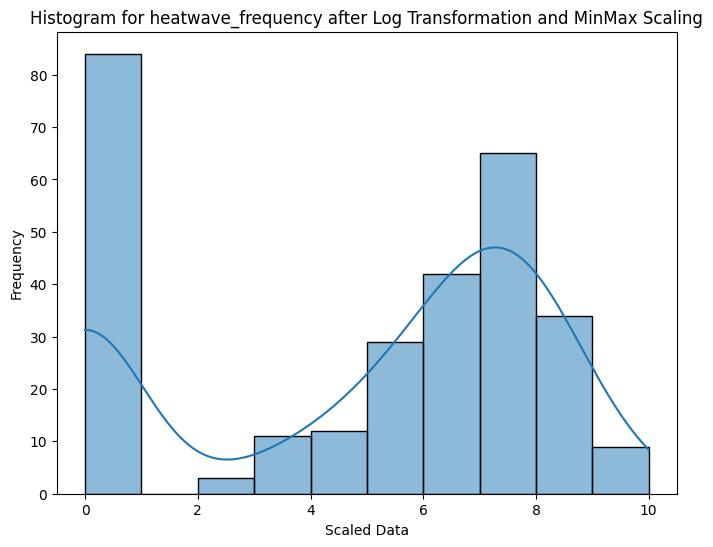

processed : heatwave_duration min: 0.1 max: 8.406198604340677
heatwave_duration: Log Transformation and z-score Scaling - skew=-0.460, kurtosis=-1.425


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


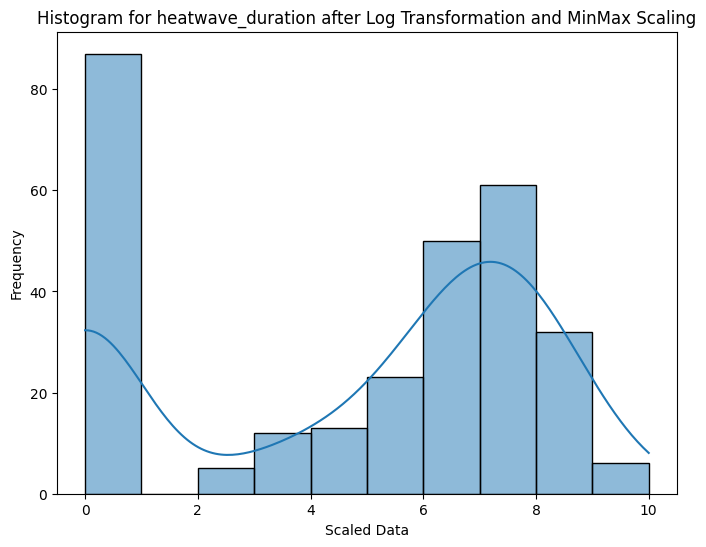

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


processed : heatwave_severity min: 0.1 max: 7.747777837300412
heatwave_severity: Log Transformation and z-score Scaling - skew=0.878, kurtosis=-1.079


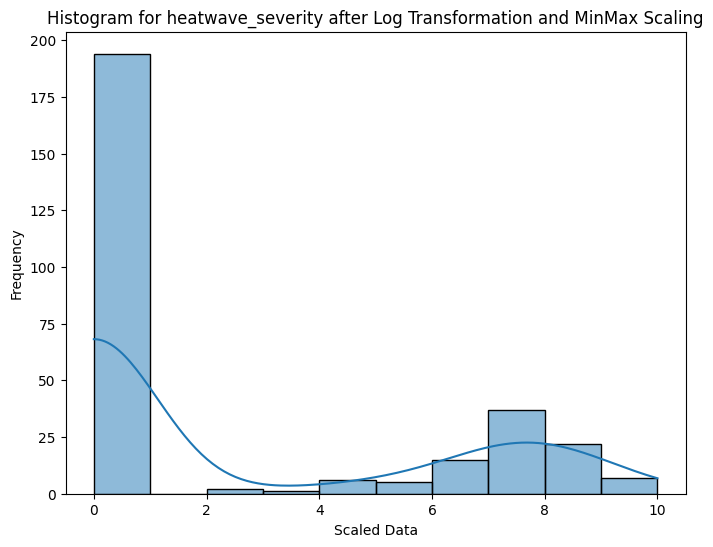

processed : river_flood min: 0.1 max: 7.810106640317287
river_flood: Log Transformation and z-score Scaling - skew=-0.107, kurtosis=-1.688


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


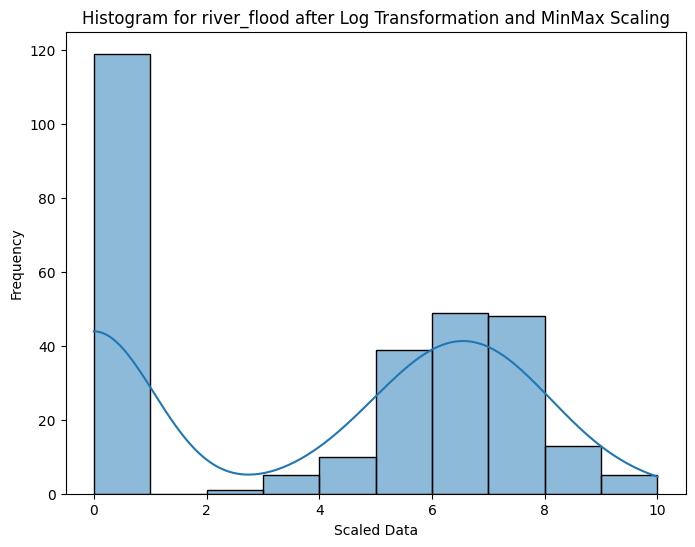

processed : agricultural_drought min: 2.0100770538541783 max: 6.048364725751526
agricultural_drought: Log Transformation and z-score Scaling - skew=0.099, kurtosis=-1.141


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


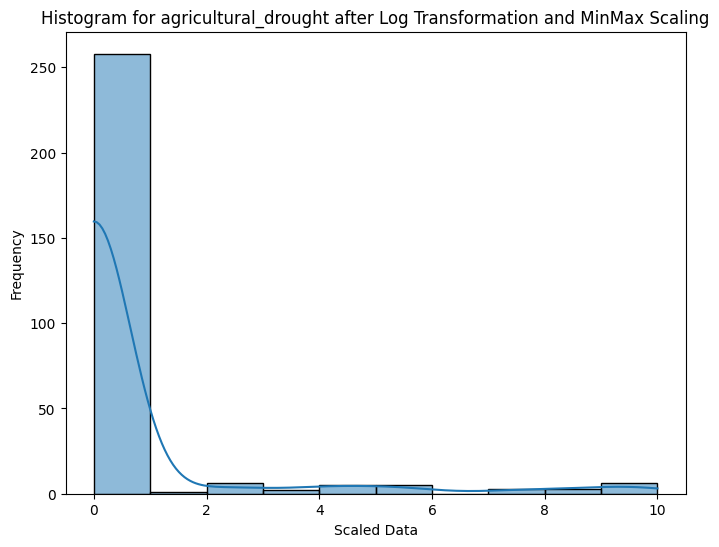

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


processed : tropical_storm min: 0.1 max: 8.129676560531612
tropical_storm: Log Transformation and z-score Scaling - skew=0.720, kurtosis=-1.140


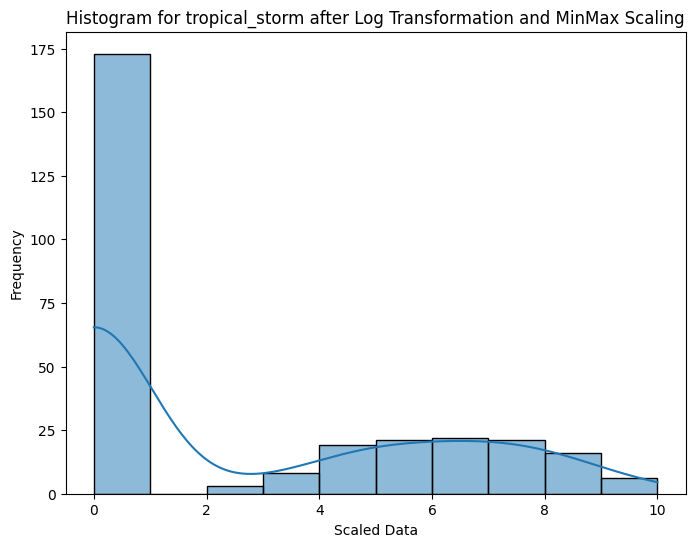

processed : pluvial_flood min: 0.1 max: 8.412208238420407
pluvial_flood: Log Transformation and z-score Scaling - skew=-0.597, kurtosis=-1.237


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


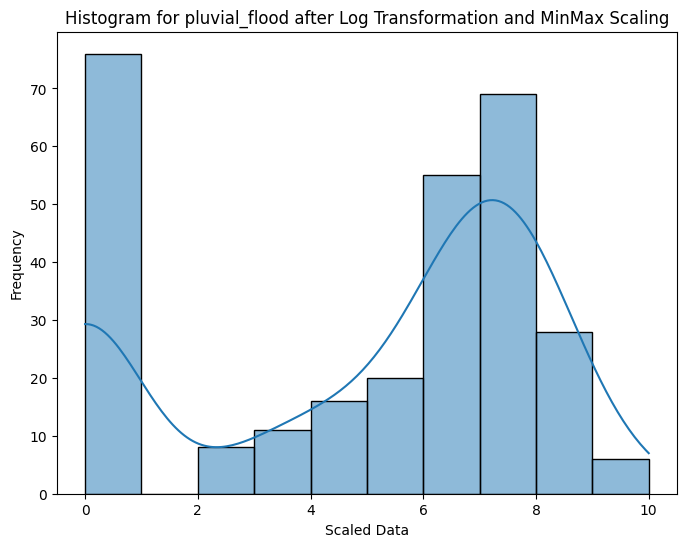

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


processed : coastal_flood min: 0.1 max: 7.056632617270453
coastal_flood: Log Transformation and z-score Scaling - skew=0.466, kurtosis=-1.160


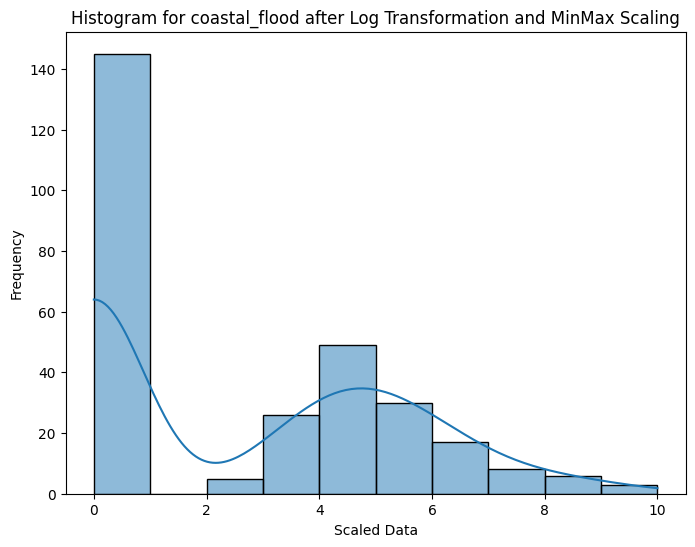

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


processed : extreme_heat min: 0.1 max: 8.492146256728619
extreme_heat: Log Transformation and z-score Scaling - skew=0.715, kurtosis=-1.319


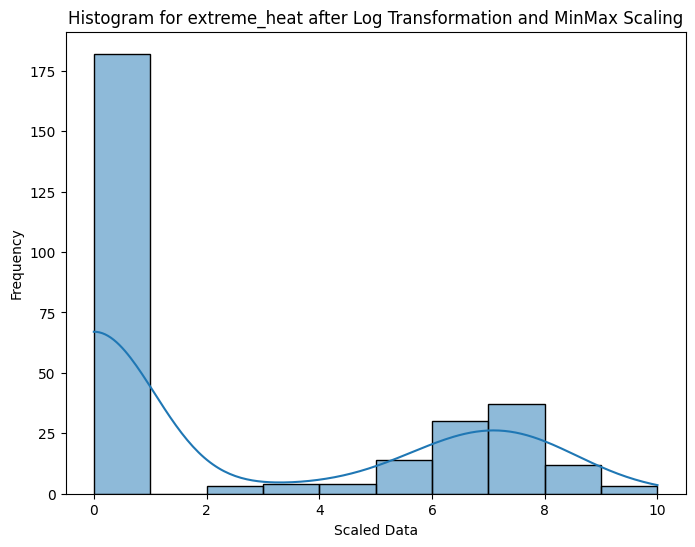

processed : drought_spi min: 0.1 max: 6.622901551507607
drought_spi: Log Transformation and z-score Scaling - skew=1.621, kurtosis=1.041


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


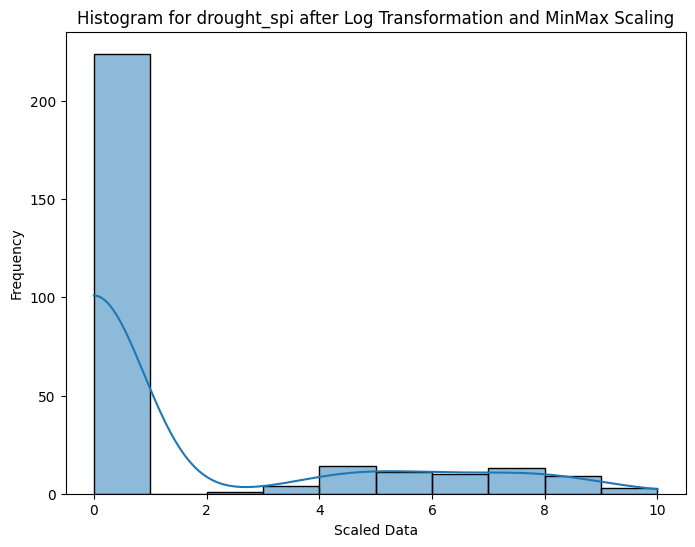

processed : drought_sma min: 0.1 max: 5.96388777125369
drought_sma: Log Transformation and z-score Scaling - skew=1.969, kurtosis=2.162


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


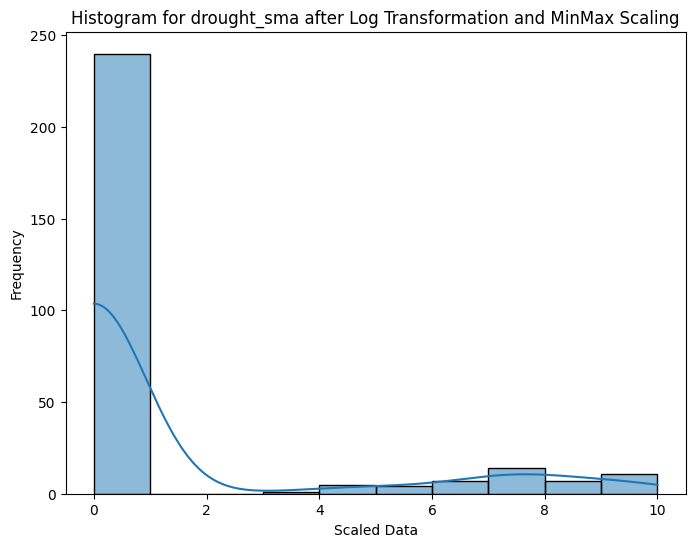

processed : fire_frequency min: 0.1 max: 6.924853998418833
fire_frequency: Log Transformation and z-score Scaling - skew=0.397, kurtosis=-1.470


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


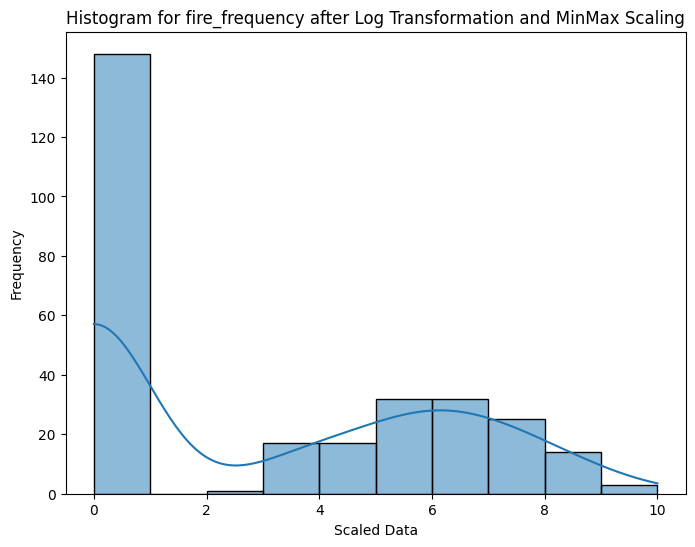

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


processed : fire_FRP min: 0.1 max: 6.459802770488782
fire_FRP: Log Transformation and z-score Scaling - skew=-0.147, kurtosis=-1.672


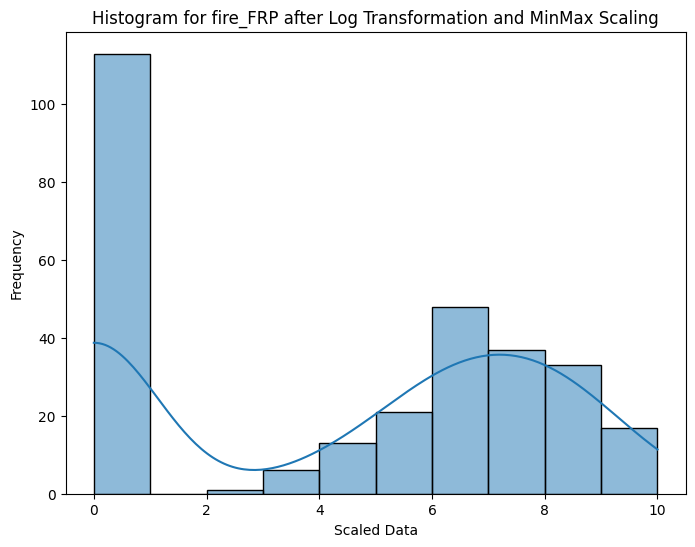

processed : sand_dust min: 0.1 max: 7.142609347734547
sand_dust: Log Transformation and z-score Scaling - skew=0.414, kurtosis=-1.318


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


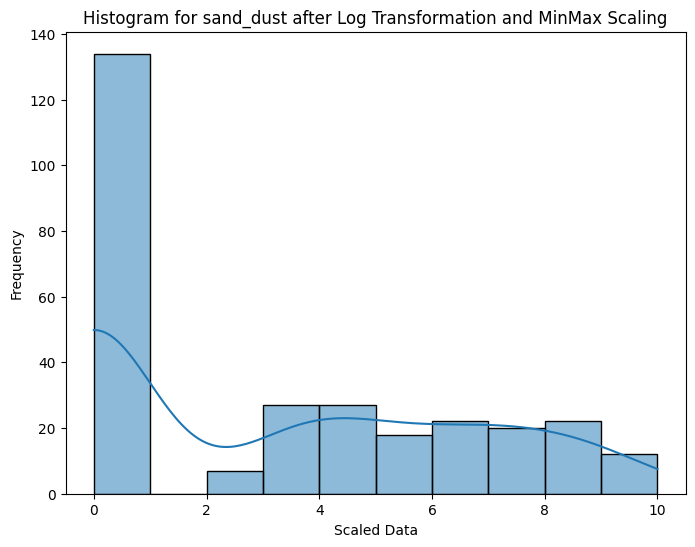

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


processed : vectorborne_malariapf min: 0.1 max: 7.978834881711023
vectorborne_malariapf: Log Transformation and z-score Scaling - skew=1.041, kurtosis=-0.706


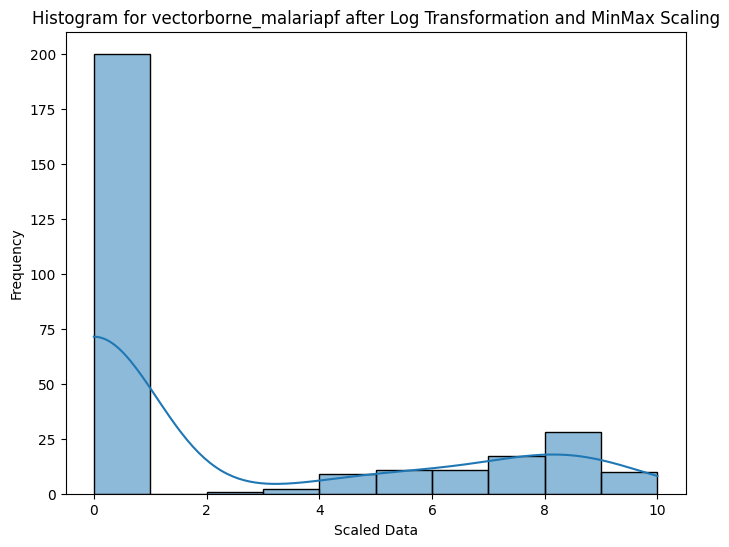

processed : vectorborne_malariapv min: 0.1 max: 8.458361258561188
vectorborne_malariapv: Log Transformation and z-score Scaling - skew=1.805, kurtosis=1.627


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


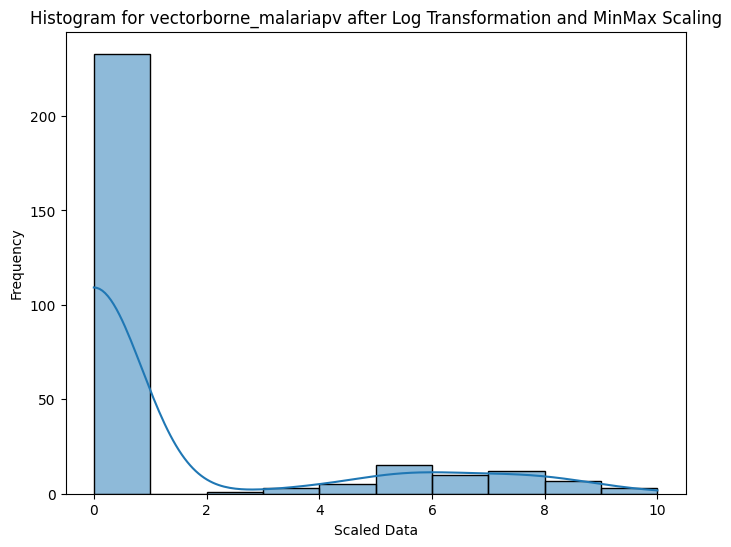

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


processed : air_pollution min: 0.1 max: 8.563095002934322
air_pollution: Log Transformation and z-score Scaling - skew=-0.751, kurtosis=-0.915


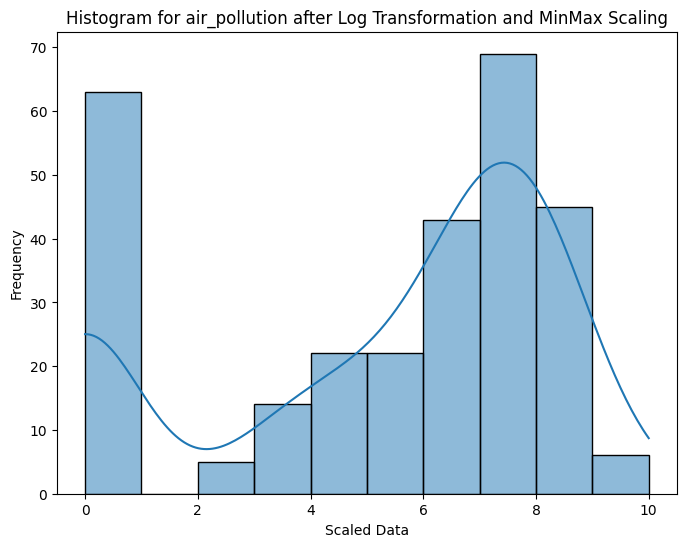

In [ ]:


# Define source and destination folder paths
source_folder = "/content/drive/MyDrive/"
destination_folder = "/content/drive/MyDrive/CCRI/pillar2/"

# # Load the main CSV to extract unique ISO3 values
# df_main = pd.read_csv("/content/drive/MyDrive/CCRI/Risk_Exposure_ByAOI_adm0_Mean.csv")
# df_main.rename(columns={'ISO3': 'iso3'}, inplace=True)  # Ensure lowercase consistency
# unique_iso3 = df_main[['iso3']].drop_duplicates()

# Get all copied CSV files
csv_files = glob.glob(os.path.join(destination_folder, "*.csv"))

# Initialize merged DataFrame with unique iso3
merged_df = unique_iso3.copy()

# Folder containing the CSV files
path = r'/content/drive/MyDrive/p1_exposure'
all_files = glob.glob(path + "/*.csv")

for file in all_files:
    # Exclude the specified file
    if file != '/content/drive/MyDrive/p1_exposure/child_pop_sum_adm0.csv':
      df = pd.read_csv(file, index_col=None, header=0)
      filename_only = file.split('/')[-1]
      hazard_name = '_'.join(filename_only.split('_')[:2])

      if 'ISO3' not in df.columns or 'child_population_exposed' not in df.columns:
          continue  # Skip files missing required columns

      df = df[['ISO3', 'child_population_exposed']].dropna()

      # Apply iterative trimming
      df['child_population_exposed'] = df['child_population_exposed'].dropna().values  # Ensure no NaNs
      df['child_population_exposed'] = np.where(df['child_population_exposed'] > 100,
                                          np.log10(df['child_population_exposed']),
                                          0.1)
      trimmed_values, min_trimmed, max_trimmed = trim_outliers_iteratively(df['child_population_exposed'])

      # Normalize using final min/max
      scaler = MinMaxScaler(feature_range=(0, 10))
      df['value_normalized'] = (df['child_population_exposed'] - min_trimmed) / (max_trimmed - min_trimmed) * 10

      # Ensure values are within [0,10]
      df['value_normalized'] = np.clip(df['value_normalized'], 0, 10)
      df['min'] = min_trimmed
      df['max'] = max_trimmed
      print(f"processed : {hazard_name} min: {min_trimmed} max: {max_trimmed}" )
      current_skew = skew(trimmed_values)
      current_kurtosis = kurtosis(trimmed_values)
      print(f"{hazard_name}: Log Transformation and z-score Scaling - skew={current_skew:.3f}, kurtosis={current_kurtosis:.3f}")
      # Plot histogram and normality check
      plt.figure(figsize=(8, 6))
      sns.histplot(df['value_normalized'], kde=True)
      plt.title(f"Histogram for {hazard_name} after Log Transformation and MinMax Scaling")
      plt.xlabel("Scaled Data")
      plt.ylabel("Frequency")
      plt.show()



In [ ]:
df

,ISO3,child_population_exposed,value_normalized,min,max
0,ATA,0.100000,0.000000,0.1,8.563095
1,AIA,3.005955,3.433679,0.1,8.563095
2,ESH,5.025922,5.820473,0.1,8.563095
3,PYF,0.100000,0.000000,0.1,8.563095
4,PYF,0.100000,0.000000,0.1,8.563095
...,...,...,...,...,...
284,UMI,0.100000,0.000000,0.1,8.563095
285,UMI,0.100000,0.000000,0.1,8.563095
286,MNP,0.100000,0.000000,0.1,8.563095
287,PRI,5.610870,6.511649,0.1,8.563095


In [ ]:
df = ''

In [ ]:
total_pop_df

,ISO3,child_population,name
0,ATA,0.000000,Antarctica
1,AIA,1883.303038,Anguilla
2,ESH,115282.649925,Western Sahara
3,PYF,34928.599432,French Polynesia
4,PYF,0.000000,Clipperton Island
...,...,...,...
284,UMI,0.000000,Palmyra Atoll
285,UMI,0.000000,Navassa Island
286,MNP,7614.932183,Northern Mariana Is. (USA)
287,PRI,416932.579874,Puerto Rico (USA)


0.0
100.0
Processed: heatwave_frequency | Min: 6.939939182137827e-05 | Max: 99.99999999999997
heatwave_frequency: Log Transformation and z-score Scaling - skew=-0.037, kurtosis=-1.387


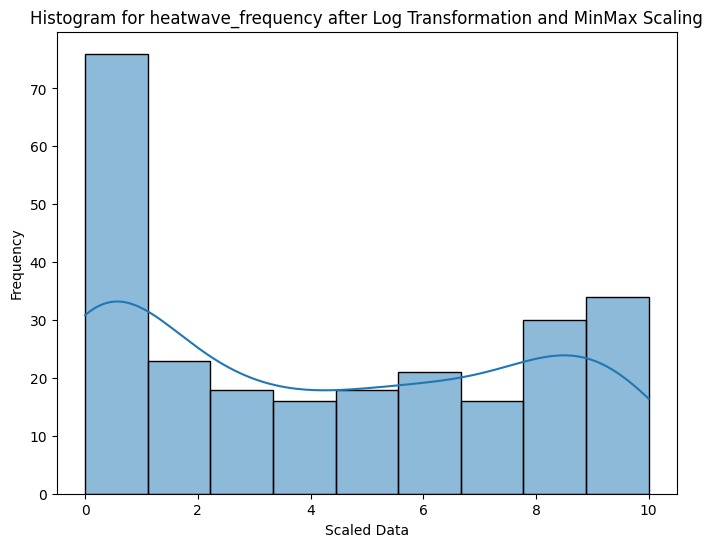

0.0
100.00000000000003
Processed: heatwave_duration | Min: 0.010669842259351742 | Max: 100.0
heatwave_duration: Log Transformation and z-score Scaling - skew=-0.126, kurtosis=-1.214


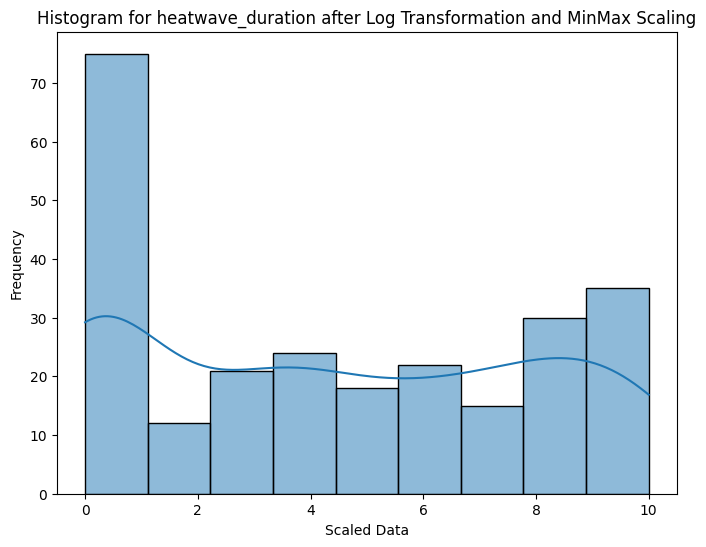

0.0
100.00000000000003
Processed: heatwave_severity | Min: 3.752967696948829e-05 | Max: 100.0
heatwave_severity: Log Transformation and z-score Scaling - skew=0.024, kurtosis=-1.666


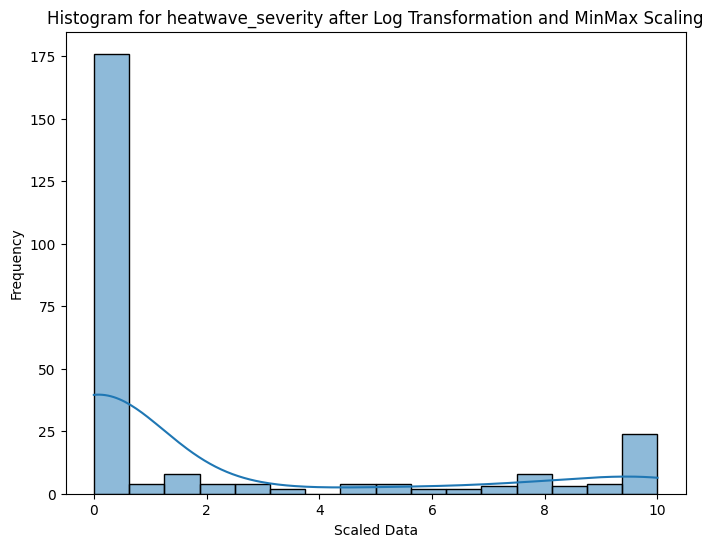

0.0
75.48369050244017
Processed: river_flood | Min: 0.39984364196112165 | Max: 33.5398987500129
river_flood: Log Transformation and z-score Scaling - skew=1.719, kurtosis=3.309


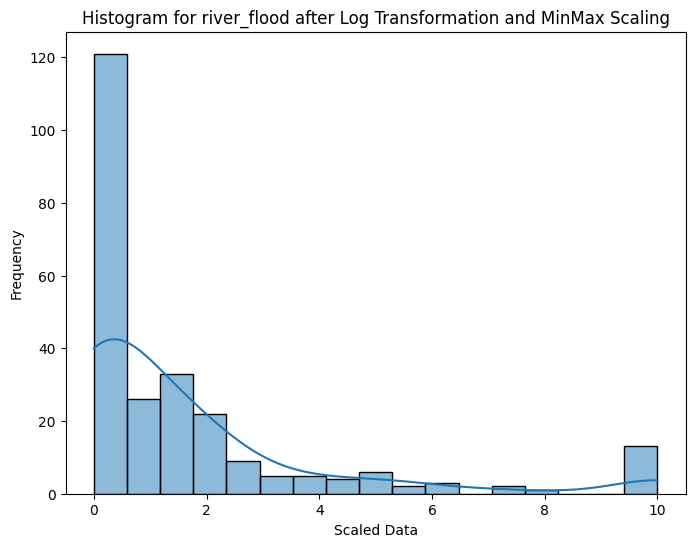

0.0
8.976146224728813
Processed: agricultural_drought | Min: 0.0017896380815971907 | Max: 1.882165024054494
agricultural_drought: Log Transformation and z-score Scaling - skew=1.922, kurtosis=2.663


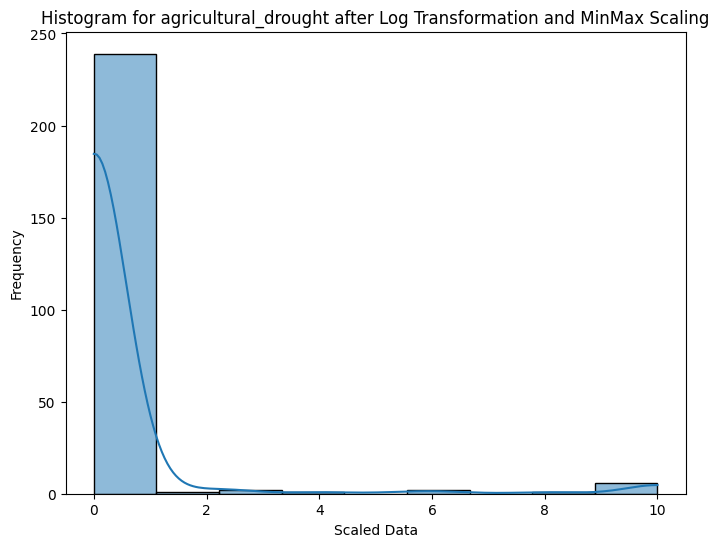

0.0
100.00000000000003
Processed: tropical_storm | Min: 1.3990350283845764e-05 | Max: 100.0
tropical_storm: Log Transformation and z-score Scaling - skew=-1.248, kurtosis=-0.132


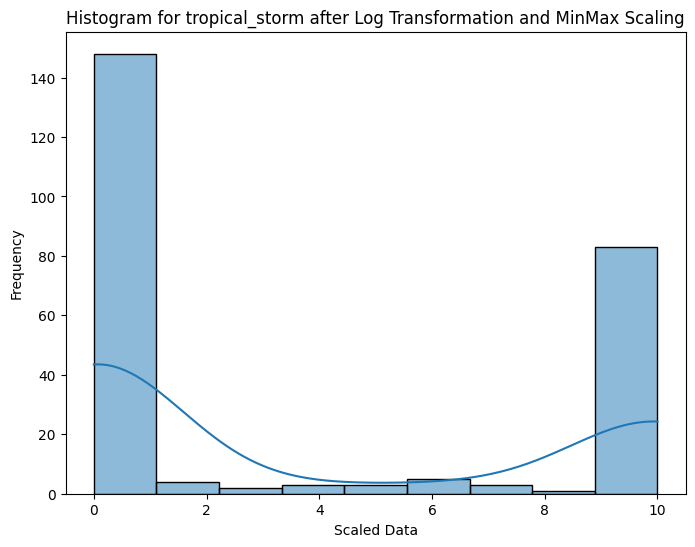

0.0
100.0
Processed: pluvial_flood | Min: 0.4368552112499798 | Max: 99.99981712445631
pluvial_flood: Log Transformation and z-score Scaling - skew=-0.246, kurtosis=-0.819


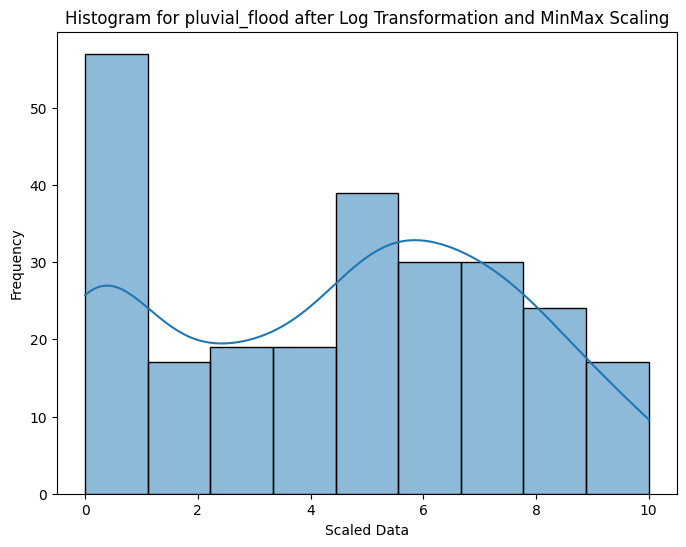

0.0
81.70725270298668
Processed: coastal_flood | Min: 0.021557262934157308 | Max: 3.8296276874285744
coastal_flood: Log Transformation and z-score Scaling - skew=1.941, kurtosis=3.473


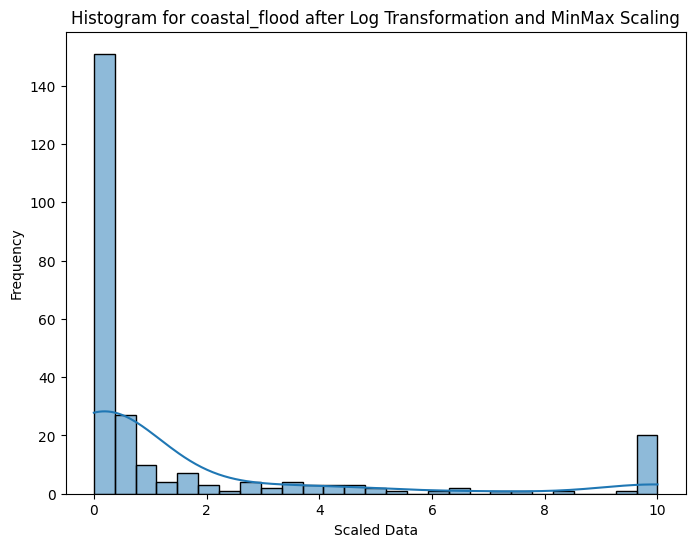

0.0
100.0
Processed: extreme_heat | Min: 0.003628715020401661 | Max: 99.99999999999997
extreme_heat: Log Transformation and z-score Scaling - skew=0.603, kurtosis=-1.121


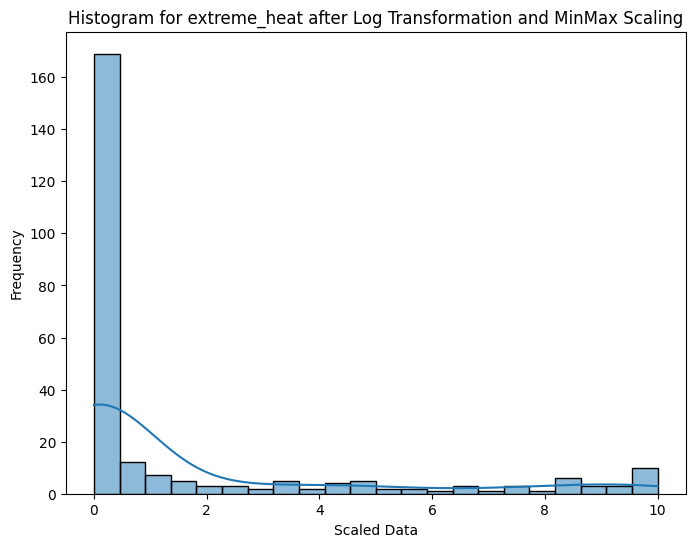

0.0
50.325708279635265
Processed: drought_spi | Min: 0.0015209201555067625 | Max: 4.199289593013662
drought_spi: Log Transformation and z-score Scaling - skew=1.951, kurtosis=2.649


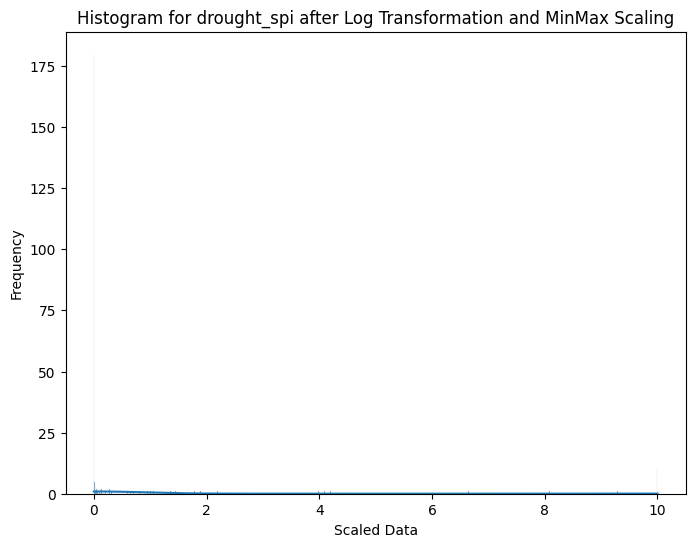

0.0
18.33649070762204
Processed: drought_sma | Min: 0.005940552175943264 | Max: 3.859435424964048
drought_sma: Log Transformation and z-score Scaling - skew=1.911, kurtosis=3.187


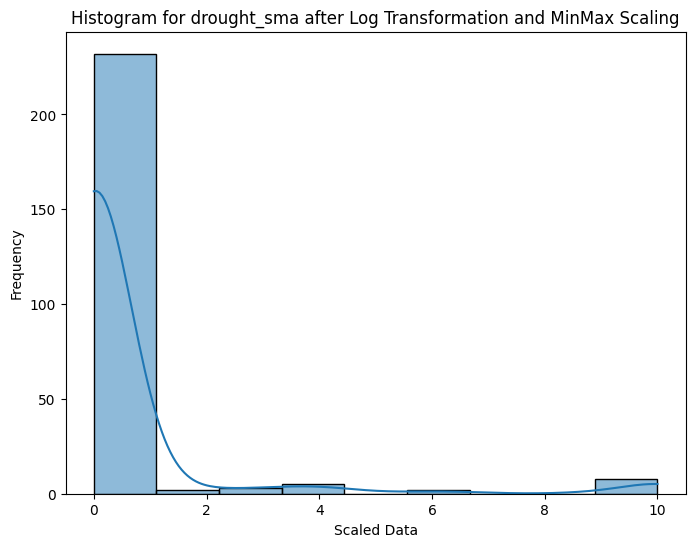

0.0
38.971152663273315
Processed: fire_frequency | Min: 0.007912962628292296 | Max: 3.4635567959867433
fire_frequency: Log Transformation and z-score Scaling - skew=1.735, kurtosis=2.972


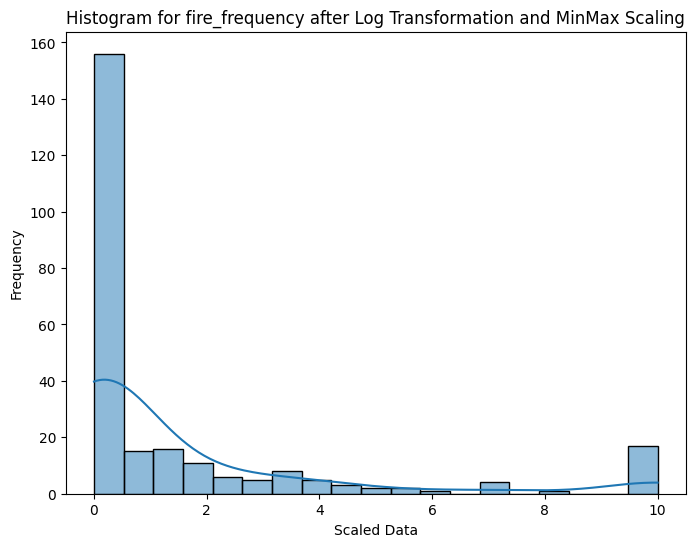

0.0
46.931650624310286
Processed: fire_FRP | Min: 0.04692712091536962 | Max: 11.422762859315085
fire_FRP: Log Transformation and z-score Scaling - skew=1.702, kurtosis=2.784


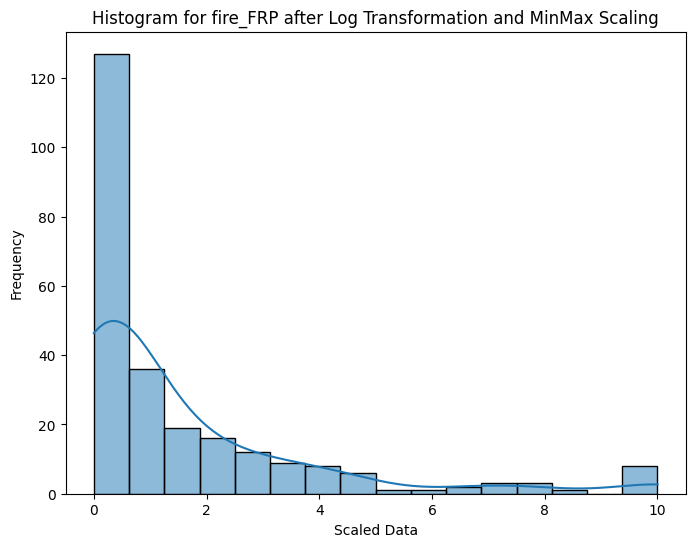

0.0
100.0
Processed: sand_dust | Min: 0.01272968121062298 | Max: 14.97323051775343
sand_dust: Log Transformation and z-score Scaling - skew=1.948, kurtosis=3.298


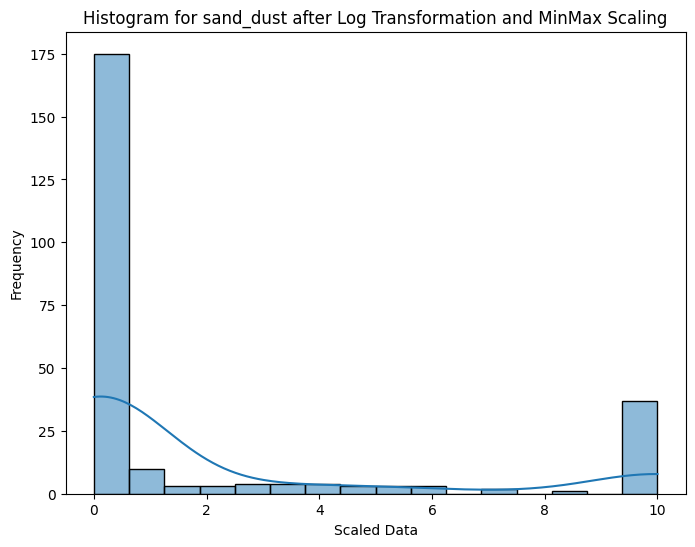

0.0
100.00000000000003
Processed: vectorborne_malariapf | Min: 7.501071777776373e-05 | Max: 99.99999999999997
vectorborne_malariapf: Log Transformation and z-score Scaling - skew=-0.212, kurtosis=-1.800


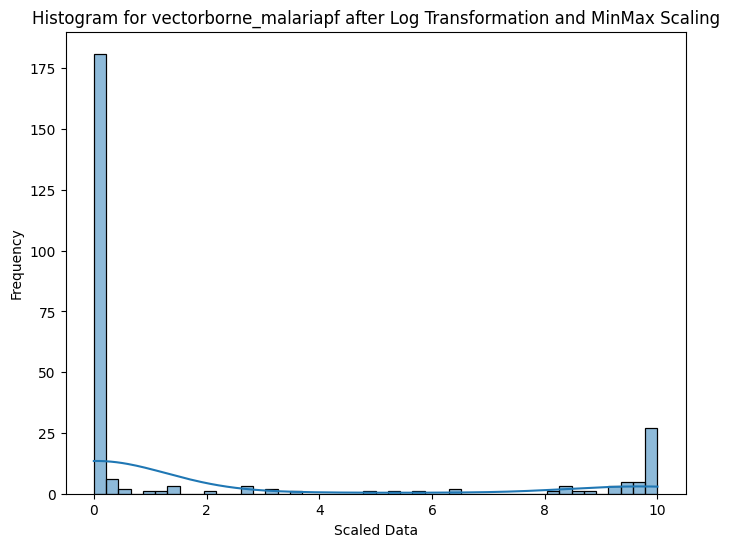

0.0
99.97077475371428
Processed: vectorborne_malariapv | Min: 0.00048132259829387355 | Max: 99.9409684558687
vectorborne_malariapv: Log Transformation and z-score Scaling - skew=0.524, kurtosis=-1.476


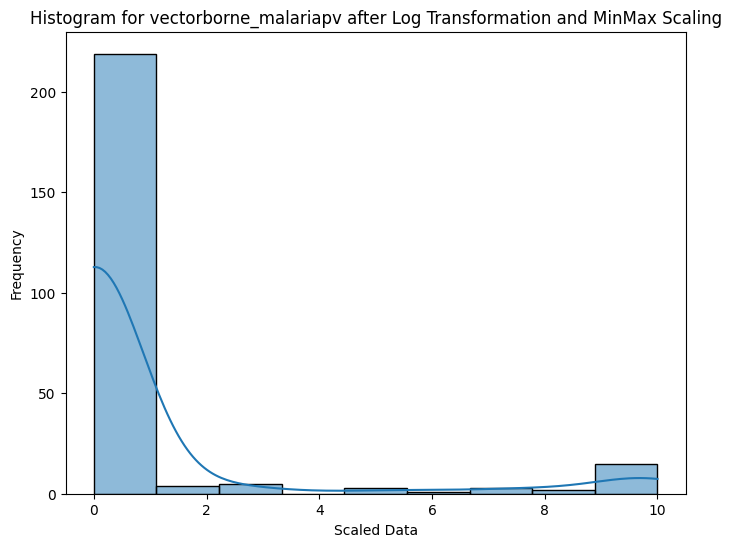

0.0
100.00000000000007
Processed: air_pollution | Min: 0.06325207834241524 | Max: 100.00000000000004
air_pollution: Log Transformation and z-score Scaling - skew=-1.958, kurtosis=3.250


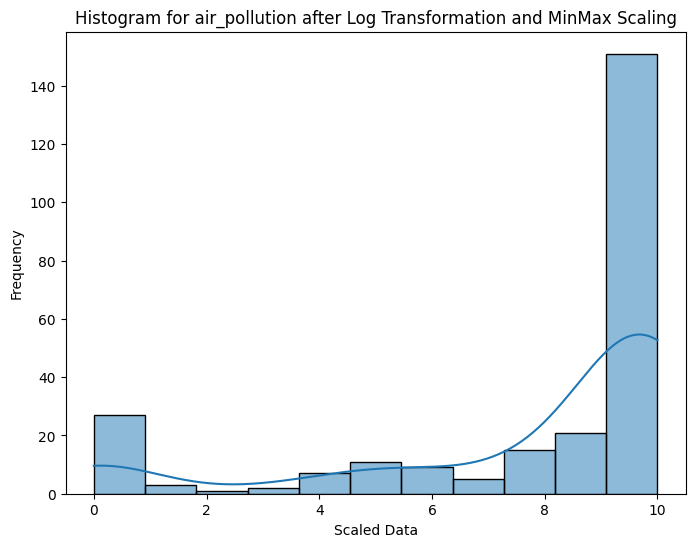

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, kurtosis

# Load total child population data
total_pop_df = pd.read_csv('/content/drive/MyDrive/p1_exposure/child_pop_sum_adm0.csv', index_col=None, header=0)

if 'ISO3' not in total_pop_df.columns or 'child_population' not in total_pop_df.columns:
    raise ValueError("Total population file is missing required columns: 'ISO3' and 'child_population'.")

# # Dictionary to map total child population by ISO3
# total_population_map = total_pop_df.set_index('ISO3')['child_population'].to_dict()

# Process each hazard file
for file in all_files:
    # Exclude the total population file
    if file == '/content/drive/MyDrive/p1_exposure/child_pop_sum_adm0.csv':
        continue

    df = pd.read_csv(file, index_col=None, header=0)
    filename_only = file.split('/')[-1]
    hazard_name = '_'.join(filename_only.split('_')[:2])
    df = df.merge(total_pop_df[['ISO3', 'name', 'child_population']], on=['ISO3', 'name'], how='left')

    if 'ISO3' not in df.columns or 'child_population_exposed' not in df.columns:
        continue  # Skip files missing required columns

    df = df[['ISO3', 'child_population_exposed','child_population']].dropna()
    df['relative_population_exposure'] = np.where(
        (df['child_population'] > 0) & (~df['child_population'].isna()),
        (df['child_population_exposed'] / df['child_population']) * 100,
        np.nan  # Assign NaN instead of inf
    )


    print( df['relative_population_exposure'].min())
    print( df['relative_population_exposure'].max())
    # Apply iterative trimming
    # Trim outliers
    trimmed_values, min_trimmed, max_trimmed = trim_outliers_iteratively(df['relative_population_exposure'])

    # Check if there are enough values to calculate skewness and kurtosis
    if len(trimmed_values) > 2:
        current_skew = skew(trimmed_values)
        current_kurtosis = kurtosis(trimmed_values)
    else:
        current_skew, current_kurtosis = np.nan, np.nan

    # Normalize using final min/max
    scaler = MinMaxScaler(feature_range=(0, 10))
    if min_trimmed != max_trimmed:  # Prevent division by zero
        df['value_normalized'] = (df['relative_population_exposure'] - min_trimmed) / (max_trimmed - min_trimmed) * 10
    else:
        df['value_normalized'] = 0  # Assign zero if no variation

    # Ensure values are within [0,10]
    df['value_normalized'] = np.clip(df['value_normalized'], 0, 10)
    df['min'] = min_trimmed
    df['max'] = max_trimmed

    print(f"Processed: {hazard_name} | Min: {min_trimmed} | Max: {max_trimmed}" )
    print(f"{hazard_name}: Log Transformation and z-score Scaling - skew={current_skew:.3f}, kurtosis={current_kurtosis:.3f}")

    # Plot histogram and normality check
    plt.figure(figsize=(8, 6))
    sns.histplot(df['value_normalized'], kde=True)
    plt.title(f"Histogram for {hazard_name} after Log Transformation and MinMax Scaling")
    plt.xlabel("Scaled Data")
    plt.ylabel("Frequency")
    plt.show()


In [6]:
import os
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, kurtosis

# Define file paths
exposure_path = "/content/drive/MyDrive/p1_exposure"
total_population_file = "/content/drive/MyDrive/p1_exposure/child_pop_sum_adm0.csv"

# Load total child population data
total_pop_df = pd.read_csv(total_population_file, usecols=['ISO3', 'name', 'child_population'])

# Ensure unique ISO3-name pairs before merging
total_pop_df = total_pop_df.groupby(['ISO3', 'name'], as_index=False).agg({'child_population': 'mean'})

# Get all CSV files for exposure
exposure_files = glob.glob(os.path.join(exposure_path, "*.csv"))

# Initialize empty list for processed data
exposure_data_list = []

### **Process Each File in One Loop**
for file in exposure_files:
    if file == total_population_file:
        continue  # Skip total population file

    df = pd.read_csv(file)  # Read full file to check available columns
    filename_only = os.path.basename(file)
    hazard_name = '_'.join(filename_only.split('_')[:2])  # Extract hazard name

    # Ensure required columns exist
    required_cols = {'ISO3', 'name', 'child_population_exposed'}
    if not required_cols.issubset(df.columns):
        print(f"Skipping {file}: Missing columns {required_cols - set(df.columns)}")
        continue  # Skip if required columns are missing

    df.dropna(subset=['child_population_exposed'], inplace=True)

    ### **Step 1: Absolute Exposure Processing**
    # Log transform with clipping for values >100, otherwise assign 0.1
    df['absolute_exposure'] = np.where(df['child_population_exposed'] > 100,
                                       np.log10(df['child_population_exposed'].clip(lower=1)),  # Clip to avoid log10(0)
                                       0.1)

    # Trim outliers for absolute exposure
    trimmed_values, min_trimmed, max_trimmed = trim_outliers_iteratively(df['absolute_exposure'])
    print(f"Processed absolute exposure: {hazard_name} | Min: {min_trimmed} | Max: {max_trimmed}" )

    # Normalize using min_trimmed and max_trimmed
    df['absolute_value_normalized'] = (df['absolute_exposure'] - min_trimmed) / (max_trimmed - min_trimmed) * 10

    # Ensure values are within [0,10]
    df['absolute_value_normalized'] = np.clip(df['absolute_value_normalized'], 0, 10)
    df['absolute_min'] = min_trimmed
    df['absolute_max'] = max_trimmed

    ### **Step 2: Relative Exposure Processing**
    # Merge with total population data
    df = df.merge(total_pop_df, on=['ISO3', 'name'], how='left')

    # Compute relative exposure (%)
    df['relative_exposure'] = np.where(
        (df['child_population'] > 0) & (~df['child_population'].isna()),
        (df['child_population_exposed'] / df['child_population']) * 100,
        0
    )

    # Trim outliers for relative exposure
    trimmed_values, min_trimmed, max_trimmed = trim_outliers_iteratively(df['relative_exposure'])
    print(f"Processed relative exposure: {hazard_name} | Min: {min_trimmed} | Max: {max_trimmed}" )
    # Normalize relative exposure
    if min_trimmed != max_trimmed:  # Prevent division by zero
        df['relative_value_normalized'] = (df['relative_exposure'] - min_trimmed) / (max_trimmed - min_trimmed) * 10
    else:
        df['relative_value_normalized'] = 0  # Assign zero if no variation

    df['relative_value_normalized'] = np.clip(df['relative_value_normalized'], 0, 10)
    df['relative_min'] = min_trimmed
    df['relative_max'] = max_trimmed

    # Rename columns for final merging
    df.rename(columns={
        'absolute_value_normalized': hazard_name + '_absolute',
        'absolute_min': hazard_name + '_absolute_min',
        'absolute_max': hazard_name + '_absolute_max',
        'relative_value_normalized': hazard_name + '_relative',
        'relative_min': hazard_name + '_relative_min',
        'relative_max': hazard_name + '_relative_max'
    }, inplace=True)

    # Append processed data to list
    exposure_data_list.append(df[['ISO3', 'name',
                                  hazard_name + '_absolute', hazard_name + '_absolute_min', hazard_name + '_absolute_max',
                                  hazard_name + '_relative', hazard_name + '_relative_min', hazard_name + '_relative_max']])

### **Final Merge Step**
# Concatenate all processed DataFrames
merged_exposure_df = pd.concat(exposure_data_list, axis=1).drop_duplicates(subset=['ISO3', 'name'])

# Ensure no duplicate columns before merging
merged_exposure_df = merged_exposure_df.loc[:, ~merged_exposure_df.columns.duplicated()]

# Save merged exposure data
output_path = "/content/drive/MyDrive/p1_exposure/Merged_Exposure_Data.csv"
merged_exposure_df.to_csv(output_path, index=False)
print(f"Merged exposure data saved to {output_path}")


Processed absolute exposure: heatwave_frequency | Min: 0.1 | Max: 8.242208888382612
Processed relative exposure: heatwave_frequency | Min: 0.0 | Max: 100.0
Processed absolute exposure: heatwave_duration | Min: 0.1 | Max: 8.406198604340677
Processed relative exposure: heatwave_duration | Min: 0.0 | Max: 100.00000000000003
Processed absolute exposure: heatwave_severity | Min: 0.1 | Max: 7.747777837300412
Processed relative exposure: heatwave_severity | Min: 0.0 | Max: 100.00000000000003
Processed absolute exposure: river_flood | Min: 0.1 | Max: 7.810106640317287
Processed relative exposure: river_flood | Min: 0.39984364196112165 | Max: 33.5398987500129
Processed absolute exposure: coastal_flood | Min: 0.1 | Max: 7.056632617270453
Processed relative exposure: coastal_flood | Min: 0.021557262934157308 | Max: 3.8296276874285744
Processed absolute exposure: pluvial_flood | Min: 0.1 | Max: 8.412208238420407
Processed relative exposure: pluvial_flood | Min: 0.0 | Max: 100.0
Processed absolute 

In [7]:
df = pd.read_csv('/content/drive/MyDrive/p1_exposure/Merged_Exposure_Data.csv')

In [8]:
df.describe()

,heatwave_frequency_absolute,heatwave_frequency_absolute_min,heatwave_frequency_absolute_max,heatwave_frequency_relative,heatwave_frequency_relative_min,heatwave_frequency_relative_max,heatwave_duration_absolute,heatwave_duration_absolute_min,heatwave_duration_absolute_max,heatwave_duration_relative,...,vectorborne_malariapv_absolute_max,vectorborne_malariapv_relative,vectorborne_malariapv_relative_min,vectorborne_malariapv_relative_max,vectorborne_malariapf_absolute,vectorborne_malariapf_absolute_min,vectorborne_malariapf_absolute_max,vectorborne_malariapf_relative,vectorborne_malariapf_relative_min,vectorborne_malariapf_relative_max
count,289.000000,2.890000e+02,2.890000e+02,289.000000,289.0,289.0,289.000000,2.890000e+02,2.890000e+02,289.000000,...,2.890000e+02,289.000000,2.890000e+02,2.890000e+02,289.000000,2.890000e+02,2.890000e+02,289.000000,289.0,2.890000e+02
mean,4.820557,1.000000e-01,8.242209e+00,3.729112,0.0,100.0,4.696765,1.000000e-01,8.406199e+00,3.836602,...,8.458361e+00,0.800178,4.813226e-04,9.994097e+01,2.225145,1.000000e-01,7.978835e+00,1.738797,0.0,1.000000e+02
std,3.333521,4.865651e-16,6.050090e-14,3.599468,0.0,0.0,3.348374,4.865651e-16,3.025045e-14,3.616365,...,2.669157e-14,2.436227,4.344331e-19,7.402463e-13,3.473496,4.865651e-16,1.245607e-14,3.554039,0.0,2.847101e-14
min,0.000000,1.000000e-01,8.242209e+00,0.000000,0.0,100.0,0.000000,1.000000e-01,8.406199e+00,0.000000,...,8.458361e+00,0.000000,4.813226e-04,9.994097e+01,0.000000,1.000000e-01,7.978835e+00,0.000000,0.0,1.000000e+02
25%,0.000000,1.000000e-01,8.242209e+00,0.000000,0.0,100.0,0.000000,1.000000e-01,8.406199e+00,0.000000,...,8.458361e+00,0.000000,4.813226e-04,9.994097e+01,0.000000,1.000000e-01,7.978835e+00,0.000000,0.0,1.000000e+02
50%,6.157874,1.000000e-01,8.242209e+00,2.602661,0.0,100.0,6.083588,1.000000e-01,8.406199e+00,3.321344,...,8.458361e+00,0.000000,4.813226e-04,9.994097e+01,0.000000,1.000000e-01,7.978835e+00,0.000000,0.0,1.000000e+02
75%,7.550709,1.000000e-01,8.242209e+00,7.238549,0.0,100.0,7.472875,1.000000e-01,8.406199e+00,7.331739,...,8.458361e+00,0.000000,4.813226e-04,9.994097e+01,5.431861,1.000000e-01,7.978835e+00,0.184892,0.0,1.000000e+02
max,10.000000,1.000000e-01,8.242209e+00,10.000000,0.0,100.0,10.000000,1.000000e-01,8.406199e+00,10.000000,...,8.458361e+00,10.000000,4.813226e-04,9.994097e+01,10.000000,1.000000e-01,7.978835e+00,10.000000,0.0,1.000000e+02
